#### My example with unique code and different sequences from taught course

In [1]:
# Sequence analysis and transformation example

# Stem Cell Example
# WO 2020036183-A/1: Marker for Cancer Stem Cell and Drug for Targeting Cancer Stem Cell.
# https://www.ncbi.nlm.nih.gov/nuccore/MC003581.1

In [2]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq

In [3]:
#Read FASTA file

In [4]:
stem_cell_ffile = SeqIO.read("stem_cell_sequence.fasta","fasta")
stem_cell_ffile

SeqRecord(seq=Seq('ACTCGCCGCAGCCTGCGCGCCTTCTCCAGTCCGCGGTGCCATGGCCCCCGCCCG...AAA'), id='MC003581.1', name='MC003581.1', description='MC003581.1 WO 2020036183-A/1: Marker for Cancer Stem Cell and Drug for Targeting Cancer Stem Cell', dbxrefs=[])

In [5]:
#Isolate the sequence
stem_cell_seq = stem_cell_ffile.seq
stem_cell_seq

Seq('ACTCGCCGCAGCCTGCGCGCCTTCTCCAGTCCGCGGTGCCATGGCCCCCGCCCG...AAA')

#### Sequence Analysis

In [6]:
#Packages + function for metrics
from Bio.SeqUtils import GC                   #needed for GC count
from Bio.SeqUtils import MeltingTemp as mt    #needed for melting temperature

def AT(seq):
    result = float(seq.count('A')+seq.count('T'))/len(seq)*100
    return result

In [7]:
def metrics(seq):
    length = len(seq)
    at = AT(seq)
    at_1dp = "{:.1f}".format(at)
    gc= GC(seq)
    gc_1dp = "{:.1f}".format(gc)
    mp = mt.Tm_GC(seq)
    mp_1dp = "{:.1f}".format(mp)
    result = "Length of Sequence: {}bp, AT content: {}%, GC content: {}%, Melting Point: {} degree celsius".format(length,at_1dp,gc_1dp,mp_1dp)
    return result

In [8]:
metrics(stem_cell_seq)

'Length of Sequence: 2615bp, AT content: 51.2%, GC content: 48.8%, Melting Point: 79.4 degree celsius'

In [9]:
#Plotting bases as frequency
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
stem_cell_freq = Counter(stem_cell_seq)
stem_cell_freq

Counter({'A': 545, 'C': 607, 'T': 795, 'G': 668})

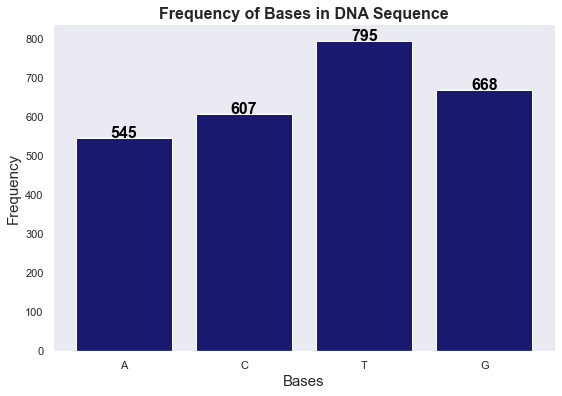

In [11]:
sns.set_style("dark")
plt.figure(figsize = (9,6))
plt.bar(stem_cell_freq.keys(),stem_cell_freq.values(), color = "midnightblue")

for X,Y in enumerate(stem_cell_freq.values()):
    plt.annotate(Y,xy=(X,Y),ha="center",color="black",fontsize=16,fontweight="bold")

plt.title("Frequency of Bases in DNA Sequence",fontsize=16,fontweight="bold")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("Bases",fontsize=15)
sns.despine()
plt.show()

#### Sequence Alignment

In [12]:
#Example - Checking multiple areas of sequence
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [13]:
seq1 = stem_cell_seq[0:10]
seq1

Seq('ACTCGCCGCA')

In [14]:
seq2 = stem_cell_seq[85:95]
seq2

Seq('GGAGTCGCCG')

In [15]:
# Global Alignment
global_alignment = pairwise2.align.globalxx(seq1,seq2)
global_alignment

[Alignment(seqA='--AC-TCGCCGCA', seqB='GGA-GTCGCCG--', score=7.0, start=0, end=13),
 Alignment(seqA='--ACTCGCCGCA', seqB='GGAGTCGCCG--', score=7.0, start=0, end=12)]

In [16]:
#Disply all alignments
for x in global_alignment:
    print(format_alignment(*x))

--AC-TCGCCGCA
  |  ||||||  
GGA-GTCGCCG--
  Score=7

--ACTCGCCGCA
  |.||||||  
GGAGTCGCCG--
  Score=7



In [17]:
# Local alignment
local_alignments = pairwise2.align.localxx(seq1,seq2)
local_alignments

[Alignment(seqA='--AC-TCGCCGCA', seqB='GGA-GTCGCCG--', score=7.0, start=2, end=11),
 Alignment(seqA='--ACTCGCCGCA', seqB='GGAGTCGCCG--', score=7.0, start=2, end=10)]

In [18]:
#Disply all alignments
for x in local_alignments:
    print(format_alignment(*x))

1 AC-TCGCCG
  |  ||||||
3 A-GTCGCCG
  Score=7

1 ACTCGCCG
  |.||||||
3 AGTCGCCG
  Score=7



#### Transforming the data

In [19]:
from Bio.SeqUtils import seq3

In [20]:
#Complement sequence
stem_cell_seq.complement()

Seq('TGAGCGGCGTCGGACGCGCGGAAGAGGTCAGGCGCCACGGTACCGGGGGCGGGC...TTT')

In [21]:
#Reverse Complement sequence
stem_cell_seq.reverse_complement()

Seq('TTTTTAGAAAGTACCAGGTTTTATTATCTTTTTATCAAAAAAAATCAGTAACAG...AGT')

In [22]:
#DNA to mRNA
stem_cell_seq.transcribe()

Seq('ACUCGCCGCAGCCUGCGCGCCUUCUCCAGUCCGCGGUGCCAUGGCCCCCGCCCG...AAA')

In [23]:
#DNA to protein
stem_cell_seq.translate()

C:\Users\meksv\anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('TRRSLRAFSSPRCHGPRPSVRAAAVLRRRSRRVDPRD*GHRPPGPPRRPILLRS...LSK')

In [24]:
#3 letter amino acid sequence of protein
stem_cell_protein = stem_cell_seq.translate()
aa = seq3(stem_cell_protein)
aa

'ThrArgArgSerLeuArgAlaPheSerSerProArgCysHisGlyProArgProSerValArgAlaAlaAlaValLeuArgArgArgSerArgArgValAspProArgAspTerGlyHisArgProProGlyProProArgArgProIleLeuLeuArgSerProThrArgArgTerGlyCysSerGlyAlaArgAlaGlyIleTerTerLeuTerAlaValTrpLeuTrpArgSerGlyTerLeuGlyArgLeuHisAspArgProTerSerCysProSerLeuGlyAlaSerArgTerProTyrProTerGluGlyArgValTrpGluProSerProHisArgThrGlnGluThrArgGlyGluTerGlyTyrProGlnGluAsnLeuThrArgTerArgGluTerGlyCysValGlnGlnGlyValAsnValGlnHisCysAlaGlyGlnGlnHisLeuTerGluAsnGlyGlyProGlySerSerAspCysGlyTrpHisArgGlyHisProLeuCysArgLeuProAspProThrAlaHisValProTyrGluGluGluGlyTerArgGlnLeuTerProGlyGlnGluThrHisLeuGlnGluSerProHisGlnTerValLeuArgValLysLeuAlaCysGlyHisTrpLeuGlyLeuTerArgGlyGlyLysProGlyAspPheGluGlyTrpThrLeuGlyTerGlyGluValAsnLeuIleLeuThrCysGlnTyrLeuGlnLeuTerLeuProLeuLysCysSerGluGluThrLeuSerSerThrValLeuProGlySerSerTerAlaLeuGlyLeuSerCysProGlyArgLysMetAspSerThrTrpProPheTerArgGlnAspTrpAspTrpIleThrSerTerThrSerSerTerGluSerArgSerAlaLeuLysProIleLeuThrMetProHisProGluLeuLeuTerSerGlnGlyAlaAsnGlyCysCysVal

In [25]:
#Other Features - Viewing 3D models fsrm RCSB
import py3Dmol

In [26]:
view1 =py3Dmol.view(query='pdb:1EXZ')
view1.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol